In [5]:
%load_ext autoreload
%autoreload 2

from sklearn.datasets import make_classification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from targen.data import target
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Generate some data


In [6]:
n_samples = 10000
data = pd.DataFrame(
    {"col_0":np.random.uniform(size = n_samples),
     "col_1":np.random.uniform(size = n_samples)
    }
)

In [7]:
# expressions_target = {}
# # linear component
# expressions_target['linear'] = {
#     'weight':0.9,
#     'expr':'-0.5*col_0 + 1.*col_1'
# }
# expressions_target['uniform_noise'] = {'weight':1.3}

In [70]:
expressions_target = {}
# linear component
expressions_target['non_linear'] = {
    'weight':0.9,
    'expr':'(col_0-0.5)**2 +(col_1-0.5)**2'
}
expressions_target['uniform_noise'] = {'weight':1.3}


expressions_selection = {}
# linear component
expressions_selection['linear'] = {
    'weight':1,
    'expr':'0.9*(col_0) -1.2*(col_1)-0.2'
}
expressions_selection['uniform_noise'] = {'weight':0}

In [71]:
df_score_target = target.get_target_and_contributions(data, 
                                               expressions= expressions_target, 
                                               q_clip = (0.01,0.99),
                                               rescale_contributions=True,
                                               imbalance = 0.2,
                                               drop_features = False
                                              )

df_score_selection = target.get_target_and_contributions(data, 
                                               expressions= expressions_selection, 
                                               q_clip = (0.01,0.99),
                                               rescale_contributions=True,
                                               imbalance = 0.7,
                                               drop_features = False
                                              )



In [72]:
{
    col:f"{col}_target" for col in df_score_target.columns if col.startswith("score")
                               }

{'score_non_linear': 'score_non_linear_target',
 'score_uniform_noise': 'score_uniform_noise_target',
 'score_pred': 'score_pred_target',
 'score_total': 'score_total_target'}

In [73]:
df_score_target = df_score_target.rename(columns={
    col:f"{col}_target" for col in df_score_target.columns if col.startswith("score")
                               }
                      )
df_score_selection = df_score_selection.rename(columns={
    col:f"{col}_sel" for col in df_score_selection.columns if col.startswith("score")
                               }
                      )

df_score_selection = df_score_selection.rename(columns = {"y":"is_selected"})


In [74]:
exp_data = pd.concat([df_score_target, df_score_selection.drop(["col_0","col_1"],axis=1)], axis = 1)

In [75]:
exp_data.head()

,col_0,col_1,score_non_linear_target,score_uniform_noise_target,score_pred_target,score_total_target,y,score_linear_sel,score_uniform_noise_sel,score_pred_sel,score_total_sel,is_selected
0,0.707066,0.136464,0.398757,0.724818,0.398757,1.522332,0,0.842236,1.000000e-08,0.842236,1.684472,1
1,0.855579,0.756269,0.438454,0.524466,0.438454,1.401374,0,0.504335,1.000000e-08,0.504335,1.008670,1
2,0.860988,0.906222,0.678312,0.643959,0.678312,2.000582,1,0.407368,1.000000e-08,0.407368,0.814736,1
3,0.377421,0.208331,0.224628,0.261910,0.224628,0.711165,0,0.630124,1.000000e-08,0.630124,1.260248,1
4,0.719642,0.327685,0.173106,0.537213,0.173106,0.883424,0,0.721414,1.000000e-08,0.721414,1.442827,1


/Users/sandro/.miniconda/installation/envs/py_exp/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/sandro/.miniconda/installation/envs/py_exp/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


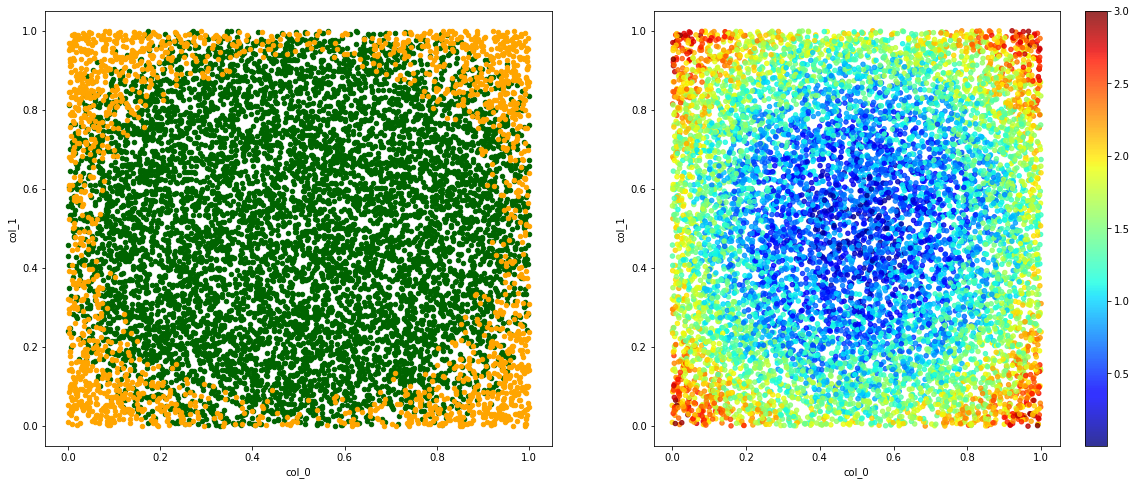

In [76]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
exp_data[exp_data["y"]==0].plot.scatter(x="col_0", y="col_1", ax = ax[0], color = "darkgreen");
exp_data[exp_data["y"]==1].plot.scatter(x="col_0", y="col_1", ax = ax[0], color = "orange");
exp_data.plot.scatter(x="col_0", y="col_1", c=exp_data["score_total_target"], cmap='jet', alpha = 0.8, ax = ax[1]);



In [77]:
sel_data = exp_data[exp_data['is_selected']==1]

In [78]:
exp_data['y'].value_counts(normalize = True)

0    0.8
1    0.2
Name: y, dtype: float64

In [79]:
exp_data['is_selected'].value_counts(normalize = True)

1    0.7
0    0.3
Name: is_selected, dtype: float64

In [80]:
sel_data['y'].value_counts(normalize = True)

0    0.814143
1    0.185857
Name: y, dtype: float64

/Users/sandro/.miniconda/installation/envs/py_exp/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/sandro/.miniconda/installation/envs/py_exp/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


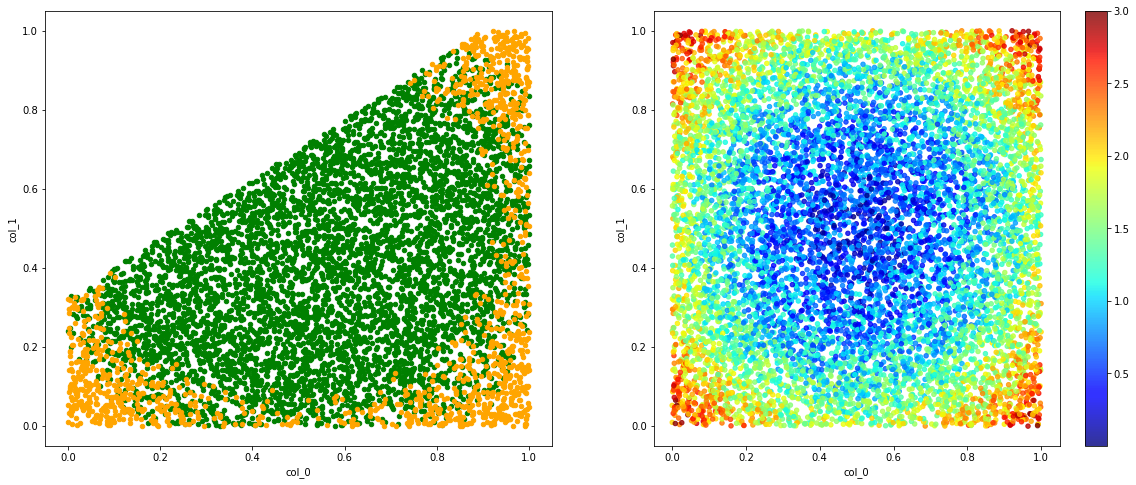

In [81]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
sel_data[sel_data["y"]==0].plot.scatter(x="col_0", y="col_1", ax = ax[0], color = "green");
sel_data[sel_data["y"]==1].plot.scatter(x="col_0", y="col_1", ax = ax[0], color = "orange");
exp_data.plot.scatter(x="col_0", y="col_1", c=exp_data["score_total_target"], cmap='jet', alpha = 0.8, ax = ax[1]);



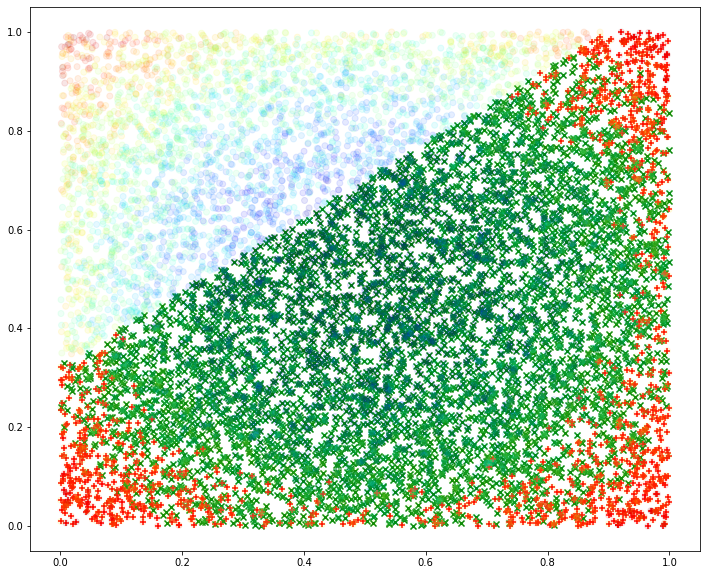

In [82]:
fig, ax = plt.subplots(figsize=(12,10))

x_0 = sel_data[sel_data["y"]==0]['col_0'].values
y_0 = sel_data[sel_data["y"]==0]['col_1'].values
x_1 = sel_data[sel_data["y"]==1]['col_0'].values
y_1 = sel_data[sel_data["y"]==1]['col_1'].values


ax.scatter(x_0,y_0,marker='x', color = 'green', alpha = 1)
ax.scatter(x_1,y_1,marker='+', color = 'red', alpha = 1)

ax.scatter(
    exp_data["col_0"], exp_data["col_1"], c=exp_data["score_total_target"], cmap='jet', alpha = 0.1
)


In [83]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=4, max_depth =3).fit(sel_data[['col_0','col_1']], sel_data['y'])

probas = rf.predict_proba(sel_data[['col_0','col_1']])[:,1]

In [84]:
def plot_contours(ax, clf, xx, yy,use_contourf=True, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    if use_contourf:
        out = ax.contourf(xx, yy, Z, **params)
    else:
        out = ax.contour(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, z=None, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1

    if z is None:
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        return xx, yy
    else:
        z_min, z_max = z.min() - 1, z.max() + 1
        xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, h),
                                 np.arange(y_min, y_max, h),
                                 np.arange(z_min, z_max, h))
        return xx, yy, zz



x_0 = exp_data[exp_data["y"]==0]['col_0'].values
y_0 = exp_data[exp_data["y"]==0]['col_1'].values
x_1 = exp_data[exp_data["y"]==1]['col_0'].values
y_1 = exp_data[exp_data["y"]==1]['col_1'].values
x, y = exp_data['col_0'].values, exp_data['col_1'].values
    
xx, yy = make_meshgrid(x, y, h=0.002)

(0.0, 1.0)

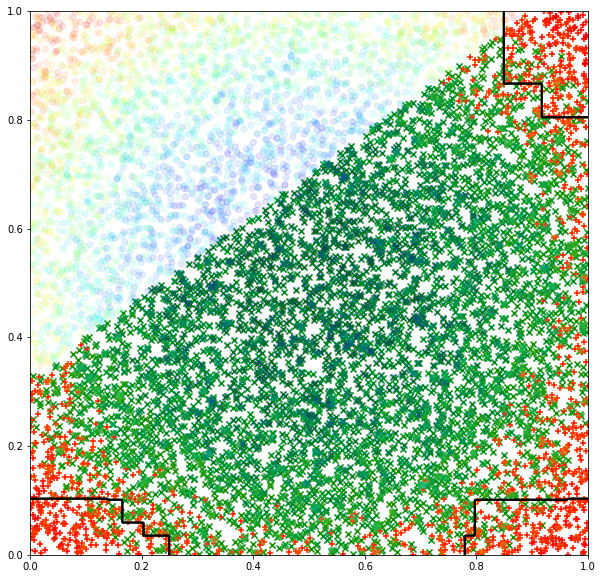

In [85]:
fig, ax = plt.subplots(figsize=(10,10))

threshold = 0.4

color_levels = 'black'


x_0 = sel_data[sel_data["y"]==0]['col_0'].values
y_0 = sel_data[sel_data["y"]==0]['col_1'].values
x_1 = sel_data[sel_data["y"]==1]['col_0'].values
y_1 = sel_data[sel_data["y"]==1]['col_1'].values


ax.scatter(x_0,y_0,marker='x', color = 'green', alpha = 1)
ax.scatter(x_1,y_1,marker='+', color = 'red', alpha = 1)

ax.scatter(
    exp_data["col_0"], exp_data["col_1"], c=exp_data["score_total_target"], cmap='jet', alpha = 0.1
)

pcm2 = plot_contours(ax=ax, clf=rf, xx=xx, yy=yy, use_contourf=False,
                            colors=color_levels, alpha=1,
                            linewidths=2,levels=np.array([threshold-0.01, threshold+0.01]))

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
# ax.set_xlabel(x_name)
# ax.set_ylabel(y_name)

